In [1]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

Generate an array of random integers between 1 and nCenters

the escape transition matrix will be an nCenters X nCenters matrix

In [4]:
nVals=20
nCenters=4
testDat=np.random.randint(1,nCenters+1,(nVals,nCenters))
tMat=np.array((testDat.shape[1],testDat.shape[1]))
testDat

array([[2, 1, 3, 1],
       [4, 4, 3, 3],
       [2, 1, 4, 2],
       [1, 4, 3, 3],
       [4, 3, 1, 4],
       [4, 3, 3, 4],
       [2, 4, 2, 4],
       [4, 3, 4, 1],
       [2, 1, 1, 1],
       [2, 3, 2, 2],
       [1, 4, 4, 1],
       [1, 2, 4, 2],
       [2, 1, 4, 4],
       [3, 2, 2, 4],
       [3, 4, 3, 2],
       [2, 3, 3, 2],
       [2, 3, 2, 4],
       [4, 4, 2, 1],
       [1, 2, 2, 4],
       [1, 3, 1, 3]])

compute the transition matrix elements as follows:

define binC to be vector of frames where the bin index matches the current center

e.g. binC=true when testDat[ii,jj]==jj

define binT as vector of escape transitions.

E.g. binT=testDat[ii,jj] when binC[ii-1]==true and binC[ii]==false

i.e. whenever the previous frame had a bin index equal to the current center and the current frame does not have a bin index equal to the current center, write the bin index of the current frame to binT, otherwise write a zero to binT.

the total time spent in the current center is then the sum of binC (since true=>1 and false=>0)

the total number of each transition can be obtained from np.unique using return_counts=true.
the entry for '0' can be discarded.

we can then use the results from np.unique and the sum of binC to set the corresponding elements of the escape transition matrix

we also plot the results for each center trajectory.

The red line indicates the location of the center for that trajectory

blue dots indicate bin index for each frame

red X's indicate escape transitions

Center 1: frames in center = 5; [2 4] [1 1]
tMat 1 to 2 = 0.2000; tMat 1 to 4 = 0.2000; 


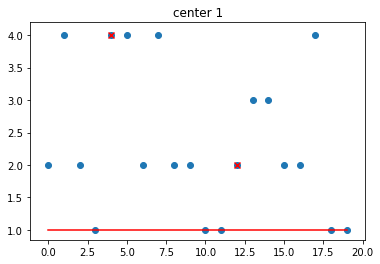

Center 2: frames in center = 3; [1 3 4] [1 1 1]
tMat 2 to 1 = 0.3333; tMat 2 to 3 = 0.3333; tMat 2 to 4 = 0.3333; 


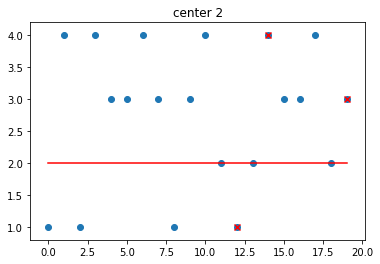

Center 3: frames in center = 6; [1 2 4] [1 2 1]
tMat 3 to 1 = 0.1667; tMat 3 to 2 = 0.3333; tMat 3 to 4 = 0.1667; 


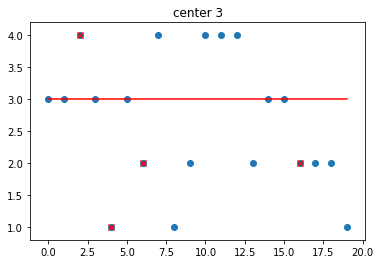

Center 4: frames in center = 7; [1 2 3] [2 1 1]
tMat 4 to 1 = 0.2857; tMat 4 to 2 = 0.1429; tMat 4 to 3 = 0.1429; 


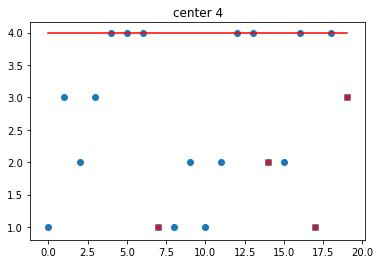

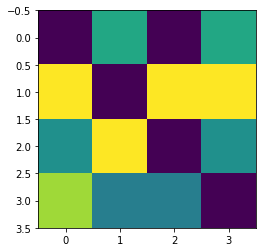

In [5]:
tMat=np.zeros((testDat.shape[1],testDat.shape[1]))
for iVal in np.arange(testDat.shape[1]):
    cVal=iVal+1
    print 'Center %g:'%cVal,
    binVec=testDat[:,iVal]
    binC=(binVec==cVal)
    binT=(1-binC[1:]) * binC[:-1]*binVec[1:]
    tCounts=np.unique(binT,return_counts=True)
    #print tCounts[0][1:],
    #print tCounts[1][1:]
    transInds=tCounts[0][1:]
    transCounts=tCounts[1][1:]
    cCount=np.sum(binC)
    print 'frames in center = %g;'%cCount,
    print transInds,
    print transCounts
    for iInd,Ind in enumerate(transInds):
        tMat[iVal,Ind-1]=1.*transCounts[iInd]/cCount
        print 'tMat %g to %g = %.4f;'%(
            iVal+1,Ind,tMat[iVal,Ind-1]),
    print ''
    plt.plot([cVal]*len(testDat),'r')
    plt.scatter(np.arange(len(testDat)),binVec)
    plt.scatter(np.arange(len(binT))[binT>0]+1,binT[binT>0],c='r',marker='x')
    plt.title('center %g'%cVal)
    plt.show()

plt.imshow(tMat)
plt.show()